######

#### KMeans
#### DBSCAN
#### GaussianMixture
#### AgglomerativeClustering
#### PCA

## Project Description :
## Bank Data Clustering 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotnine import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [10]:
# Reading Data
df3 = pd.read_csv('./Customer_Data.csv')

# Starting EDA

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Column Description

In [ ]:
# CUSTID : Identification of Credit Card holder (Categorical)
# BALANCE : Balance amount left in their account to make purchases (
# BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES : Amount of purchases made from account
# ONEOFFPURCHASES : Maximum purchase amount done in one-go
# INSTALLMENTSPURCHASES : Amount of purchase done in installment
# CASHADVANCE : Cash in advance given by the user
# PURCHASESFREQUENCY : How frequently the Purchases are being made, score between
# 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go 
#(1 = frequently purchased, 0 = not frequently purchased)
# PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done 
#(1 = frequently done, 0 = not frequently done)
# CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
# CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
# PURCHASESTRX : Numbe of purchase transactions made
# CREDITLIMIT : Limit of Credit Card for user
# PAYMENTS : Amount of Payment done by user
# MINIMUM_PAYMENTS : Minimum amount of payments made by user
# PRCFULLPAYMENT : Percent of full payment paid by user
# TENURE : Tenure of credit card service for user

In [150]:
#See Description numeric columns
df3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [151]:
# Looking at random samples from the data
df3.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1057,C11092,52.089900,0.727273,230.15,230.15,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,1600.0,0.000000,NaN,0.000000,12
2945,C13032,2848.735428,1.000000,95.67,95.67,0.00,272.559361,0.083333,0.083333,0.000000,0.083333,1,1,5500.0,679.138272,892.599825,0.000000,12
6269,C16444,27.498033,1.000000,0.00,0.00,0.00,37.771996,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,46.365579,276.074313,0.100000,12
5489,C15643,5825.287700,1.000000,230.00,230.00,0.00,1909.594385,0.083333,0.083333,0.000000,0.250000,3,1,7000.0,1537.817125,1442.075559,0.000000,12
8555,C18788,31.111952,0.909091,470.65,0.00,470.65,0.000000,0.833333,0.000000,0.833333,0.000000,0,17,3000.0,496.387423,142.115057,0.909091,12


In [8]:
# See Null values as percentage of the whole data
round(df3.isnull().sum(axis = 0)*100/df3.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [9]:
# See if there is duplicated rows

df3.duplicated().sum()

0

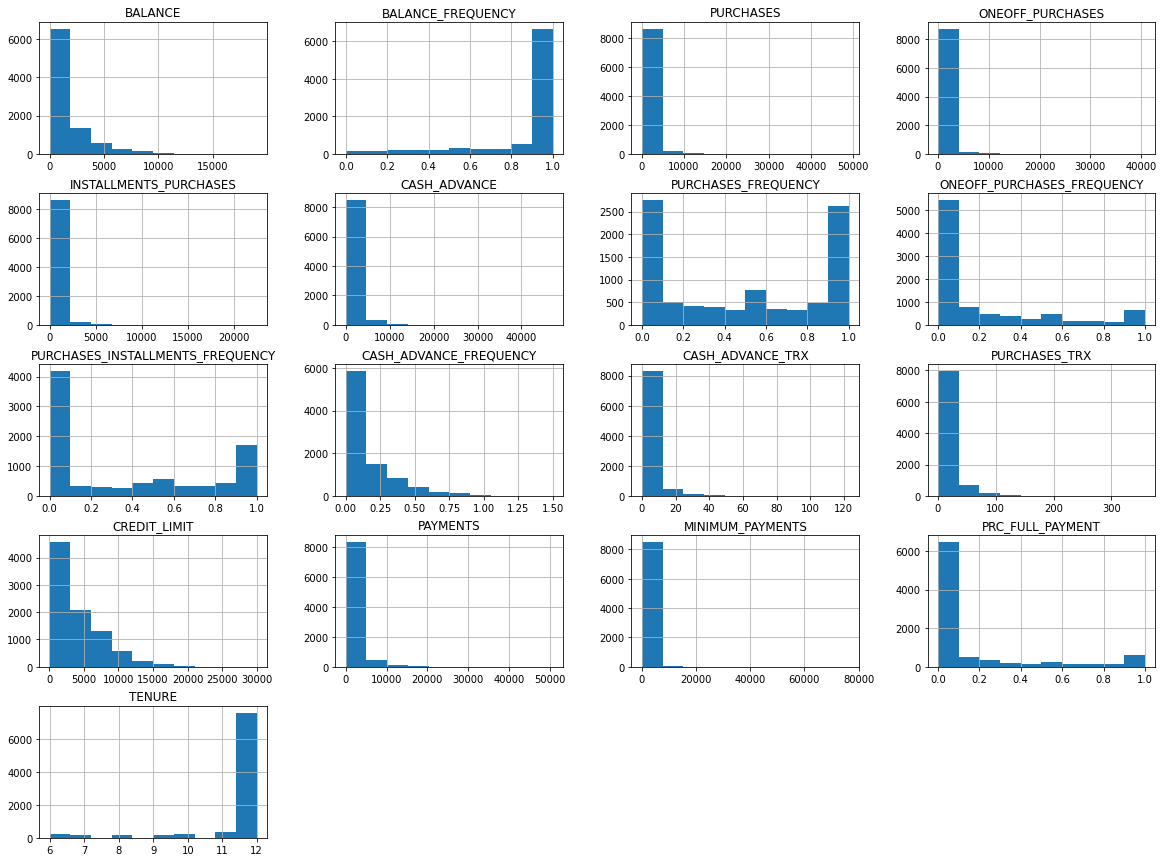

In [16]:
# See Data Distribution
df3.hist(bins=10, figsize=(20,15))
plt.show()

In [18]:
# See The Correlation between cols
correlation = df3.corr()
correlation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [25]:
# See the most correlated column
(np.abs(correlation) > 0.6).sum()
# As shown below "PURCHASES" and 'CASH_ADVANCE' and some other cols are highly correlated with some cols

BALANCE                             1
BALANCE_FREQUENCY                   1
PURCHASES                           5
ONEOFF_PURCHASES                    2
INSTALLMENTS_PURCHASES              3
CASH_ADVANCE                        3
PURCHASES_FREQUENCY                 2
ONEOFF_PURCHASES_FREQUENCY          1
PURCHASES_INSTALLMENTS_FREQUENCY    2
CASH_ADVANCE_FREQUENCY              3
CASH_ADVANCE_TRX                    3
PURCHASES_TRX                       3
CREDIT_LIMIT                        1
PAYMENTS                            2
MINIMUM_PAYMENTS                    1
PRC_FULL_PAYMENT                    1
TENURE                              1
dtype: int64

In [28]:
numeric_cols = []
for col in df3.columns:
    if df3[col].dtype != 'object':
        numeric_cols.append(col)
numeric_cols

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [32]:
# fig = sns.heatmap(df3.iloc[:,1:],annot=True)
# fig, ax = plt.subplots()
# im = ax.imshow(df3.iloc[:,1:])
# ax.set_xticks(np.arange(len(numeric_cols)), labels=numeric_cols)
# ax.set_yticks(np.arange(len(numeric_cols)), labels=numeric_cols)
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# plt.show()

# Next Is Data Cleaning and Preparation 


In [33]:
# Drop Customer ID
df3_copy = df3.copy()
df3_copy = df3_copy.drop(columns = 'CUST_ID')
df3_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [35]:
# Replacing Null in Minimum Payments Col with median
df3_copy['MINIMUM_PAYMENTS'] = df3_copy['MINIMUM_PAYMENTS'].fillna(value = df3_copy['MINIMUM_PAYMENTS'].median())
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [36]:
# Same for Credit Limit
df3_copy['CREDIT_LIMIT'] = df3_copy['CREDIT_LIMIT'].fillna(value = df3_copy['CREDIT_LIMIT'].median())
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [38]:
df3_copy.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Standardizing The Data

In [41]:
standard_df3 = StandardScaler().fit_transform(df3_copy)
standard_df3.shape

(8950, 17)

In [126]:
standard_data = pd.DataFrame(standard_df3)
standard_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


## Applying PCA

In [105]:
# Checking highest variation as a cummulative value to reach to appropriate No. of components
pca1 = PCA().fit(standard_df3)
# print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_ratio_.cumsum())

[0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833 0.94302084 0.96075453
 0.9750331  0.9872023  0.99732897 0.99999931 1.        ]


In [108]:
pca = PCA(n_components=12) 
pca_95 = pca.fit_transform(standard_df3)
pca_95.shape

(8950, 12)

In [115]:
sil_score = []
for k in range (1,18):
    
    db = DBSCAN(eps=5, min_samples=20)
    prediction = db.fit_predict(pca_df3[:,:k])
    sil_score.append(silhouette_score(standard_df3,prediction))

In [110]:
# Choosing the Optimum k for dimension reduction:
# sil_score = []
# for k in range (1,18):
    
#     db = DBSCAN(eps=5, min_samples=20)
#     prediction = db.fit_predict(pca_df3[:,:k])
#     sil_score.append(silhouette_score(pca_df3[:,:k],prediction))

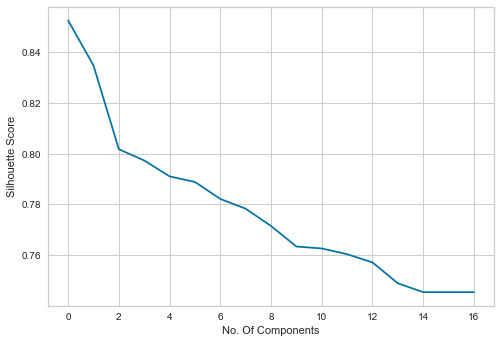

In [117]:
plt.plot(sil_score)
plt.xlabel('No. Of Components')
plt.ylabel('Silhouette Score')
plt.show()


## Fitting Data To different Models and Compare according to silhouette Score

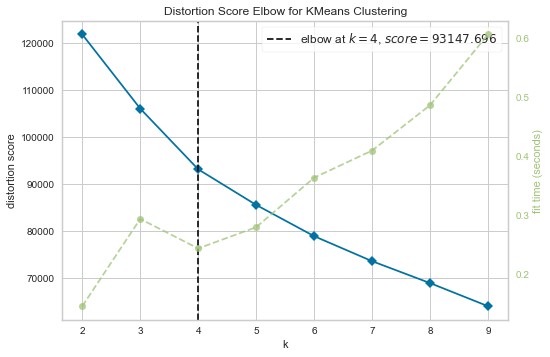

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
from yellowbrick.cluster import KElbowVisualizer
visualalizer = KElbowVisualizer(KMeans(), k=(2,10))
visualalizer.fit(pca_95)
visualalizer.show()

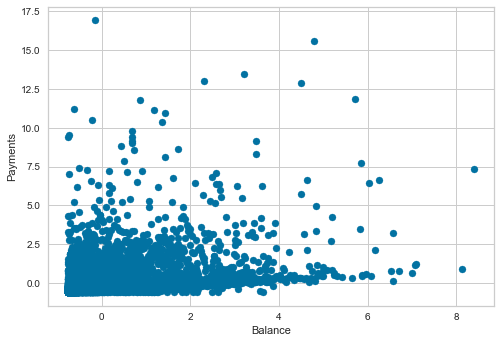

In [148]:
# plotting 2 features from the original data 
plt.scatter(x = standard_data.iloc[:,0],y=standard_data.iloc[:,13],marker='o')
plt.xlabel('Balance')
plt.ylabel('Payments')
plt.show()

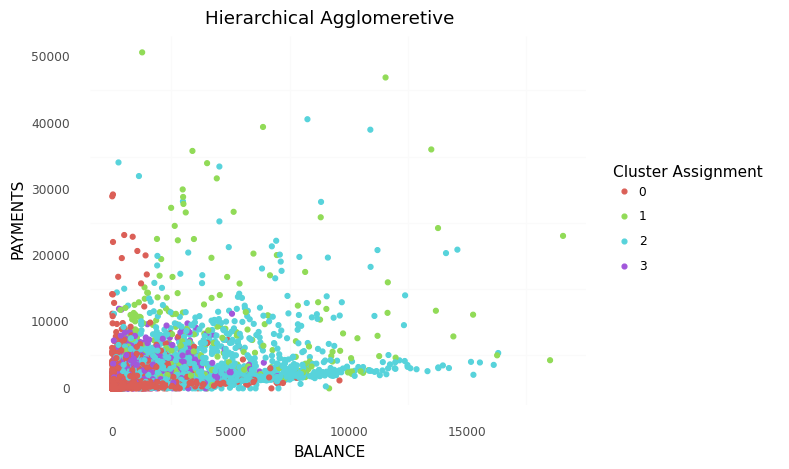

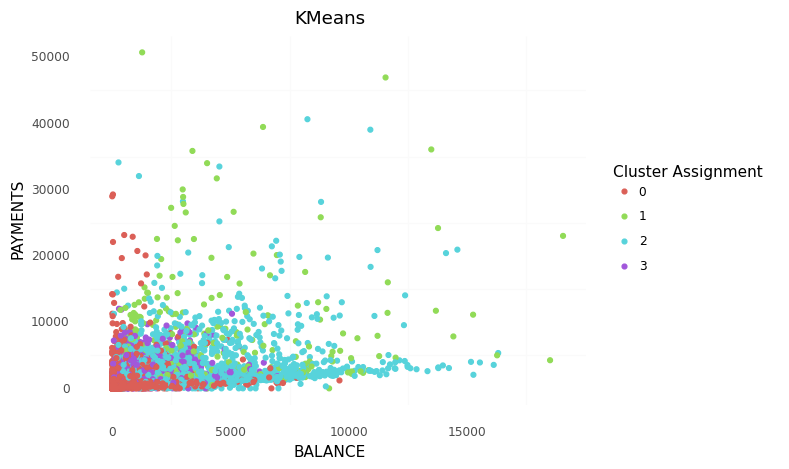

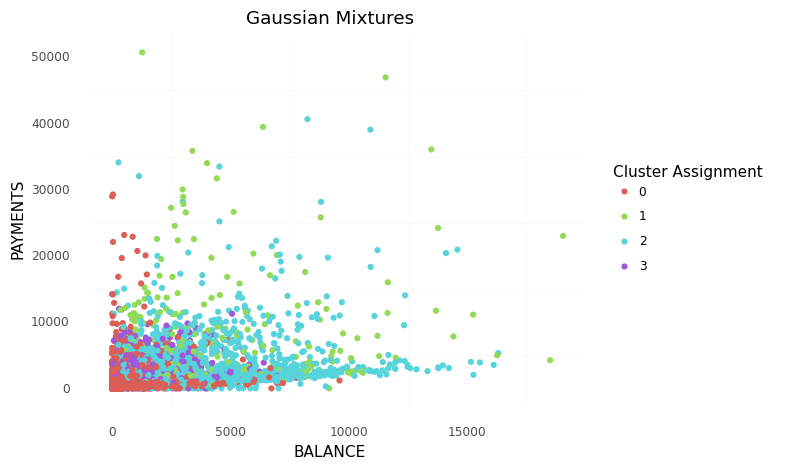

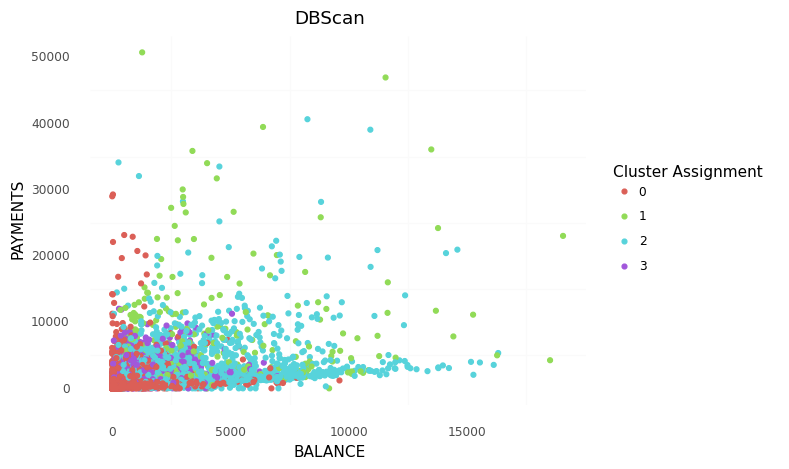


Score for K-means is  0.19778276564577293
Score for Agglomrative is  0.14216219903034438
Score for DBscan is  0.7604018846080985
Score for Gaussian Mixture is  0.029841219822266393


In [147]:
# Applying Different Models 

hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)
db = DBSCAN(eps=5, min_samples=20)

hac.fit(pca_95)
km.fit(pca_95)
gm.fit(pca_95)
db.fit(pca_95)

df3_copy["hac"] = hac.labels_
df3_copy["km"] = km.labels_
df3_copy["gm"] = gm.predict(pca_95)
df3_copy['db'] = db.fit_predict(pca_95)

print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBScan"))

# Calculating Silhouete Scores 
score1 = silhouette_score(standard_df3,df3_copy['km'])
print("Score for K-means is ",score1)
score2 = silhouette_score(standard_df3,df3_copy['hac'])
print("Score for Agglomrative is ",score2)
score3 = silhouette_score(standard_data,df3_copy['db'])
print("Score for DBscan is ",score3)
score4 = silhouette_score(standard_df3,df3_copy['gm'])
print("Score for Gaussian Mixture is ",score4)


# As shown from above Results 
# DBscan will be good choice for the problem
## Score for DBscan is  0.7604018846080985

In [152]:
pca = PCA(n_components=8) 
pca_8 = pca.fit_transform(standard_df3)
pca_8.shape

(8950, 8)

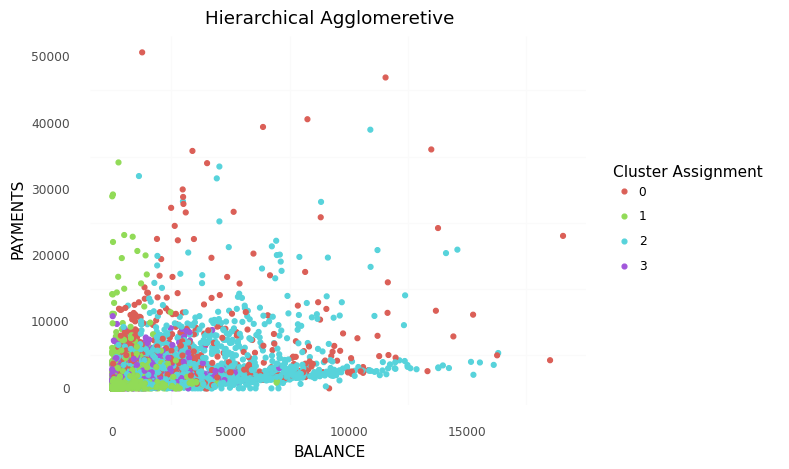

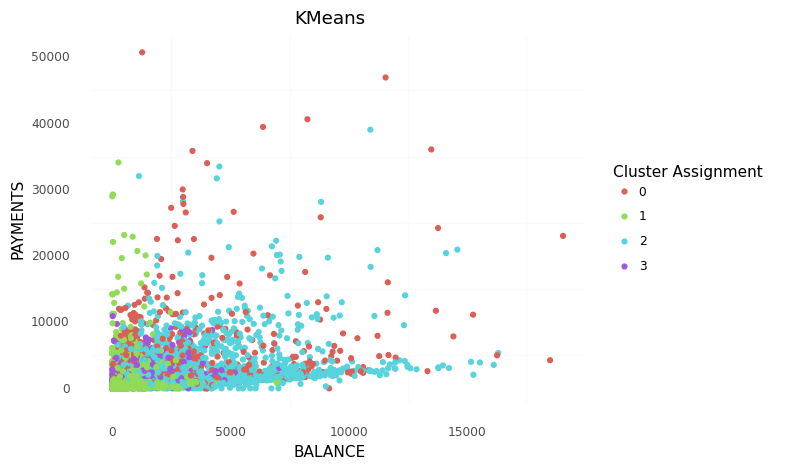

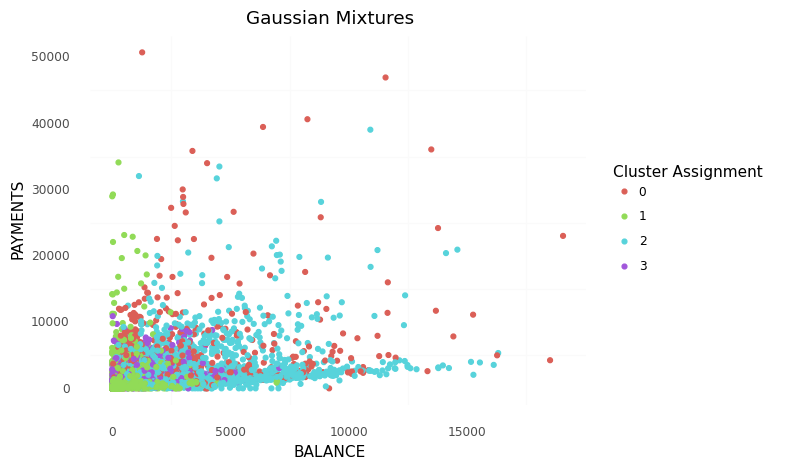

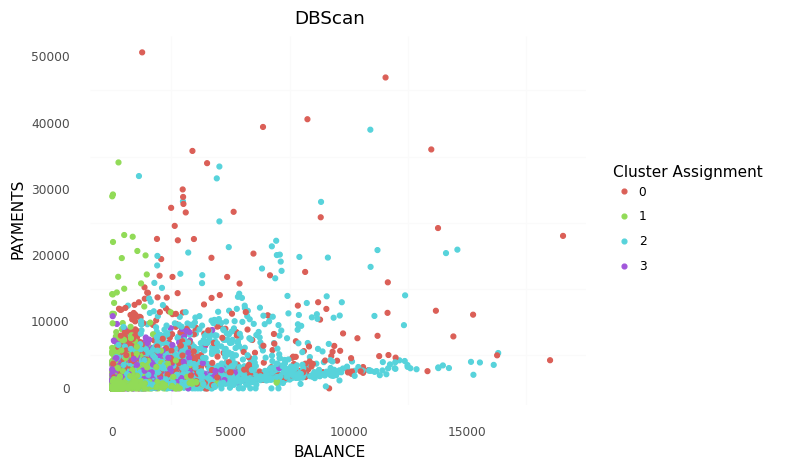


Score for K-means is  0.19893320718296922
Score for Agglomrative is  0.12391006518094791
Score for DBscan is  0.7783133004713009
Score for Gaussian Mixture is  0.0684738964036331


In [154]:
# Applying Different Models 

hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)
db = DBSCAN(eps=5, min_samples=20)

hac.fit(pca_8)
km.fit(pca_8)
gm.fit(pca_8)
db.fit(pca_8)

df3_copy["hac"] = hac.labels_
df3_copy["km"] = km.labels_
df3_copy["gm"] = gm.predict(pca_8)
df3_copy['db'] = db.fit_predict(pca_8)

print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

print(ggplot(df3_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBScan"))

# Calculating Silhouete Scores 
score1 = silhouette_score(standard_df3,df3_copy['km'])
print("Score for K-means is ",score1)
score2 = silhouette_score(standard_df3,df3_copy['hac'])
print("Score for Agglomrative is ",score2)
score3 = silhouette_score(standard_data,df3_copy['db'])
print("Score for DBscan is ",score3)
score4 = silhouette_score(standard_df3,df3_copy['gm'])
print("Score for Gaussian Mixture is ",score4)


## With 8 Components instead of 12 